# Case Study: Andy Warhol

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# Load data
data = pd.read_csv('data/auction_data_cleaned.csv', index_col=0)
data.head()

,artist_name,title,date,medium,dims,auction_date,auction_house,auction_sale,auction_lot,price_realized,...,auction_year,price_realized_USD_constant_2022,area_cm_sq,volume_cm_cu,living,years_after_death_of_auction,artist_age_at_auction,artist_age_at_artwork_completion,artwork_age_at_auction,years_ago_of_auction
0,Pablo Picasso,Fillette au bateau (Maya),1938,oil on canvas,73.3 x 60 cm,"Mar 1, 2023",Sotheby's• London,Modern & Contemporary Evening Auction,Lot6002,NaN,...,2023,NaN,4398.00,NaN,0,50.0,NaN,57.0,85.0,0
1,Pablo Picasso,Homme assis,1969,oil on panel laid down on cradled panel,28.7 x 56.6 cm,"Nov 30, 2022",Christie's,Live Auction 19901 20th/21st Century Art Eveni...,Lot35,"HK\$10,650,000• US\$1,363,489",...,2022,1363489.0,1624.42,NaN,0,49.0,NaN,88.0,53.0,1
2,Pablo Picasso,Buffalo Bill,1911,oil and sand on canvas,33.3 x 46.3 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot12,"US\$12,412,500",...,2022,12412500.0,1541.79,NaN,0,49.0,NaN,30.0,111.0,1
3,Pablo Picasso,Homme à la moustache,1970,oil and oil stick on panel,65.1 x 129.4 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot30,"US\$4,620,000",...,2022,4620000.0,8423.94,NaN,0,49.0,NaN,89.0,52.0,1
4,Pablo Picasso,Le peintre et son modèle,1964,oil and ripolin on canvas,195.0 x 130.0 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot36,"US\$10,351,500",...,2022,10351500.0,25350.00,NaN,0,49.0,NaN,83.0,58.0,1


In [3]:
# View columns
data.columns

Index(['artist_name', 'title', 'date', 'medium', 'dims', 'auction_date',
       'auction_house', 'auction_sale', 'auction_lot', 'price_realized',
       'estimate', 'bought_in', 'Nationality', 'Gender', 'birth_year',
       'death_year', 'auction_date_parsed', 'start_date', 'end_date',
       'dims_cm', 'dims_in', 'dims_mm', 'is_diameter', 'width_cm', 'height_cm',
       'depth_cm', 'width_mm', 'height_mm', 'depth_mm', 'width_in',
       'height_in', 'depth_in', 'auction_house_loc', 'auction_house_name',
       'price_realized_USD', 'auction_year',
       'price_realized_USD_constant_2022', 'area_cm_sq', 'volume_cm_cu',
       'living', 'years_after_death_of_auction', 'artist_age_at_auction',
       'artist_age_at_artwork_completion', 'artwork_age_at_auction',
       'years_ago_of_auction'],
      dtype='object')

In [4]:
# Isolate columns we want
cols = [
    'artist_name', 'Nationality', 'Gender', 'birth_year', 'death_year',
    'title', 'medium', 'start_date', 'end_date',
    'dims', 'dims_cm','is_diameter',
    'width_cm', 'height_cm','depth_cm',
    'area_cm_sq', 'volume_cm_cu',
    'auction_date_parsed','auction_year','auction_house_loc', 'auction_house_name',
    'price_realized_USD','price_realized_USD_constant_2022','bought_in',   
    'living', 'years_after_death_of_auction', 'artist_age_at_auction',
    'artist_age_at_artwork_completion', 'artwork_age_at_auction',
    'years_ago_of_auction'
]

data = data[cols]
data.head()

,artist_name,Nationality,Gender,birth_year,death_year,title,medium,start_date,end_date,dims,...,auction_house_name,price_realized_USD,price_realized_USD_constant_2022,bought_in,living,years_after_death_of_auction,artist_age_at_auction,artist_age_at_artwork_completion,artwork_age_at_auction,years_ago_of_auction
0,Pablo Picasso,Spanish,Male,1881.0,1973.0,Fillette au bateau (Maya),oil on canvas,1938.0,1938.0,73.3 x 60 cm,...,Sotheby's,NaN,NaN,NaN,0,50.0,NaN,57.0,85.0,0
1,Pablo Picasso,Spanish,Male,1881.0,1973.0,Homme assis,oil on panel laid down on cradled panel,1969.0,1969.0,28.7 x 56.6 cm,...,Christie's,1363489.0,1363489.0,NaN,0,49.0,NaN,88.0,53.0,1
2,Pablo Picasso,Spanish,Male,1881.0,1973.0,Buffalo Bill,oil and sand on canvas,1911.0,1911.0,33.3 x 46.3 cm,...,Christie's,12412500.0,12412500.0,NaN,0,49.0,NaN,30.0,111.0,1
3,Pablo Picasso,Spanish,Male,1881.0,1973.0,Homme à la moustache,oil and oil stick on panel,1970.0,1970.0,65.1 x 129.4 cm,...,Christie's,4620000.0,4620000.0,NaN,0,49.0,NaN,89.0,52.0,1
4,Pablo Picasso,Spanish,Male,1881.0,1973.0,Le peintre et son modèle,oil and ripolin on canvas,1964.0,1964.0,195.0 x 130.0 cm,...,Christie's,10351500.0,10351500.0,NaN,0,49.0,NaN,83.0,58.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53034 entries, 0 to 53033
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   artist_name                       53034 non-null  object 
 1   Nationality                       53034 non-null  object 
 2   Gender                            53034 non-null  object 
 3   birth_year                        53034 non-null  float64
 4   death_year                        37116 non-null  float64
 5   title                             51646 non-null  object 
 6   medium                            53020 non-null  object 
 7   start_date                        33198 non-null  float64
 8   end_date                          33198 non-null  float64
 9   dims                              51643 non-null  object 
 10  dims_cm                           27773 non-null  object 
 11  is_diameter                       53034 non-null  bool   
 12  widt

In [6]:
# Parse `auction_date_parsed` as DateTime object
data['auction_date_parsed'] = pd.to_datetime(data['auction_date_parsed'])

In [7]:
# Set style
sns.set_style('white')

# Axis Variables
titlefontsize = 16

# Boxplot Variables
boxprops = {'edgecolor':'black', 'linewidth':1}
whiskerprops = {'color':'black', 'linewidth':1}
medianprops = {'color': 'black', 'linewidth':1}
flierprops = {'marker': 'o', 'markerfacecolor': '#EEEEEE', 'markeredgecolor': 'black', 'alpha':0.6}


# Establish palette
colors = {
    'red': '#FE5F55',
    'blue': '#208AAE',
    'green': '#18A999',
    'yellow': '#F0F3BD',
    'darkblue': '#00072D',
    'purple': '#9368B7',
    'orange': '#F2B880',
    'pink': '#EFC3E6',
    'darkred': '#C44536',
    'darkgreen': '#4B644A',
    'gray': '#DDDDDD',
    'darkgray': '#AAAAAA'
}

colorslist = [c for c in colors.values()]

mypalette = sns.set_palette(sns.color_palette(colorslist), desat=1)
sns.color_palette(colorslist)

[(0.996078431372549, 0.37254901960784315, 0.3333333333333333),
 (0.12549019607843137, 0.5411764705882353, 0.6823529411764706),
 (0.09411764705882353, 0.6627450980392157, 0.6),
 (0.9411764705882353, 0.9529411764705882, 0.7411764705882353),
 (0.0, 0.027450980392156862, 0.17647058823529413),
 (0.5764705882352941, 0.40784313725490196, 0.7176470588235294),
 (0.9490196078431372, 0.7215686274509804, 0.5019607843137255),
 (0.9372549019607843, 0.7647058823529411, 0.9019607843137255),
 (0.7686274509803922, 0.27058823529411763, 0.21176470588235294),
 (0.29411764705882354, 0.39215686274509803, 0.2901960784313726),
 (0.8666666666666667, 0.8666666666666667, 0.8666666666666667),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666)]

In [8]:
# Slice Warhol-specific data
warhol = data[data['artist_name'] == 'Andy Warhol'].copy(deep=True)

# Introductory Notes
Much of this analysis follows a similar trajectory as [the more general EDA I've done for this dataset](https://github.com/zrottman/art_auction/blob/main/03-01_EDA.ipynb), except this time with an eye towards the specific logic of Andy Warhol's painting market for the past 30-40 years. As with the general EDA for this project, I have opted to use constant 2022 dollars rather than nominal dollars from each observation's given auction year in order to eliminate the inflation variable from analysis to the extent that this is possible. This means that price differences we see in similar artworks *should* be a function of Warhol's painting market accruing value.

# 1. Warhol's Auction Price Distribution is Positively Skewed but Log-Normal
As with the more general dataset, Warhol's auction prices show an aggressively positive skew but are log normal.

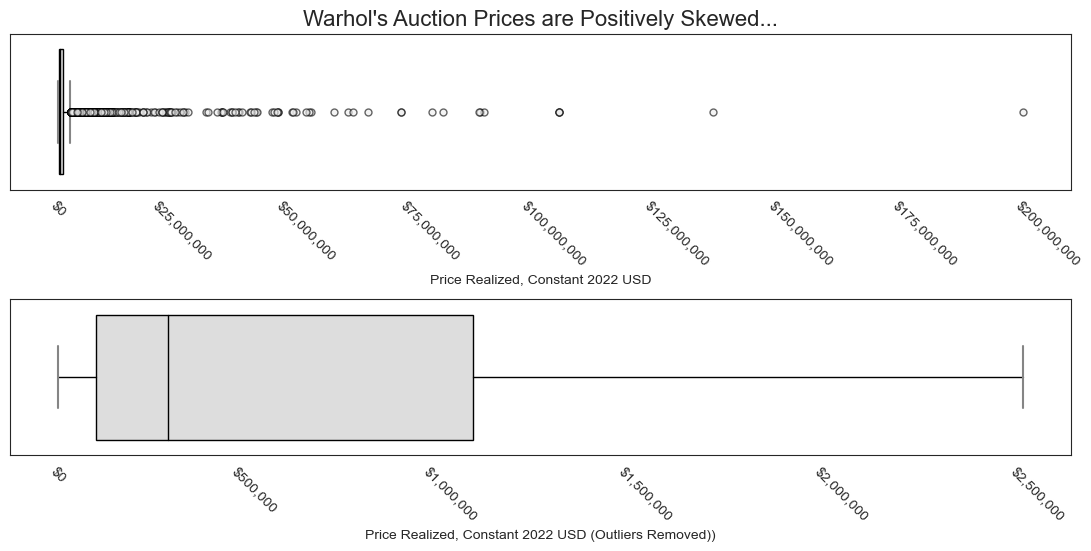

In [9]:
warhol = data[data['artist_name'] == 'Andy Warhol']

fig, axs = plt.subplots(2, 1, figsize=(12, 6))
sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    ax=axs[0],
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    flierprops=flierprops,
    medianprops=medianprops
)

sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=axs[1],
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    flierprops=flierprops,
    medianprops=medianprops
)

fig.tight_layout(pad=5)
axs[0].set_title('Warhol\'s Auction Prices are Positively Skewed...', fontsize=titlefontsize)
axs[0].set_xlabel('Price Realized, Constant 2022 USD')
axs[0].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axs[0].tick_params(axis='x', rotation=-45)

axs[1].set_xlabel('Price Realized, Constant 2022 USD (Outliers Removed))')
axs[1].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axs[1].tick_params(axis='x', rotation=-45)

As we can see, the distribution has an aggressive positive skew, with one sale approaching \\$200M--much higher than the median sale price, which looks closer to \\$300k or so.

Let's view the distribution as a histogram.

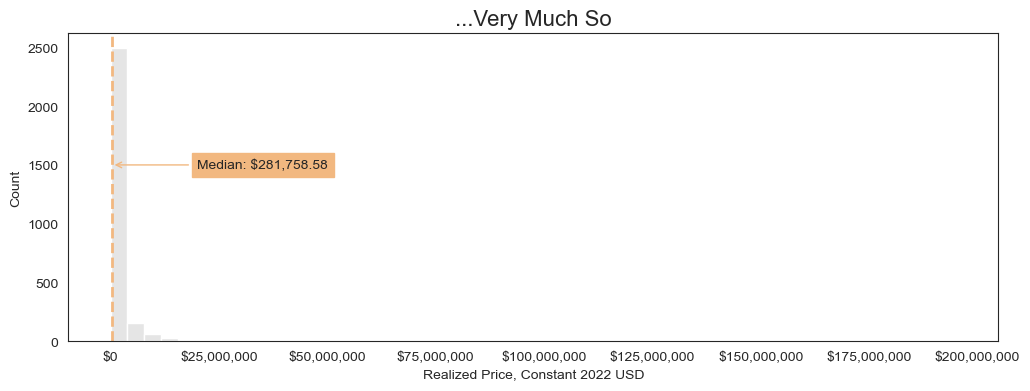

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))

warhol_median = np.median(warhol['price_realized_USD_constant_2022'].dropna())

sns.histplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    bins=50,
    ax=ax,
    color=colors['gray']
)

# Median line
ax.axvline(warhol_median, color=colors['orange'], ls='--', lw=2)
ax.annotate(
    'Median: ${:,.2f}'.format(warhol_median), xy=(warhol_median, 1500), 
    xycoords='data', xytext=(20_000_000, 1500), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)

ax.set_title("...Very Much So", fontsize=titlefontsize)
ax.set_xlabel("Realized Price, Constant 2022 USD")
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'));

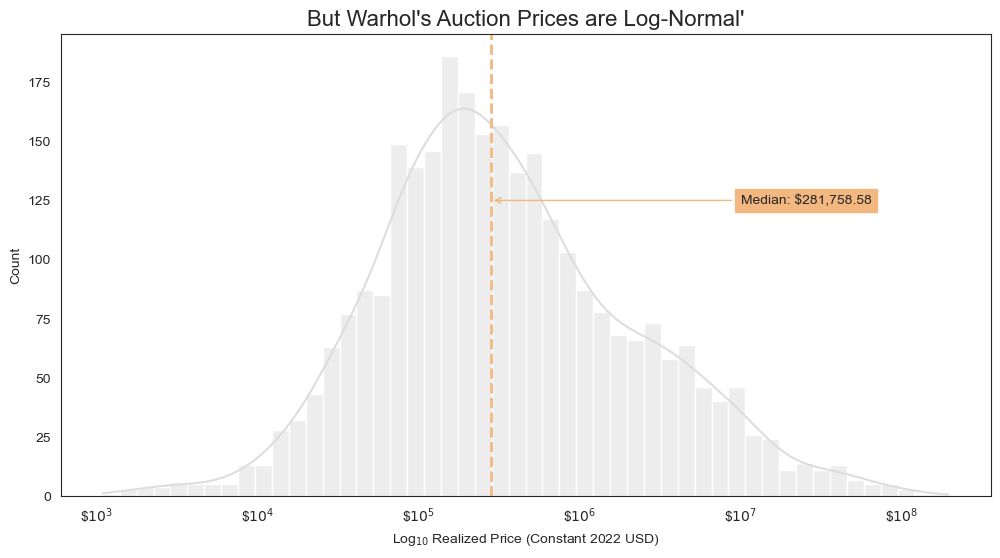

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

warhol_median = np.median(warhol['price_realized_USD_constant_2022'].dropna())

sns.histplot(
    x=np.log10(warhol['price_realized_USD_constant_2022']),
    bins=50,
    kde=True,
    ax=ax,
    color=colors['gray']
)

# Median line
ax.axvline(np.log10(warhol_median), color=colors['orange'], ls='--', lw=2)
ax.annotate(
    'Median: ${:,.2f}'.format(warhol_median), xy=(np.log10(warhol_median), 125), 
    xycoords='data', xytext=(7, 125), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)

ax.set_title("But Warhol\'s Auction Prices are Log-Normal'", fontsize=titlefontsize)
ax.set_xlabel("Log$_{10}$ Realized Price (Constant 2022 USD)")

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'));

Seeing that Warhol's auction prices are log normal suggests that our model will more effectively handle outliers if it predicts the log of auction prices.

# 2. Warhol's Painting Dimensions are Also Log-Normal

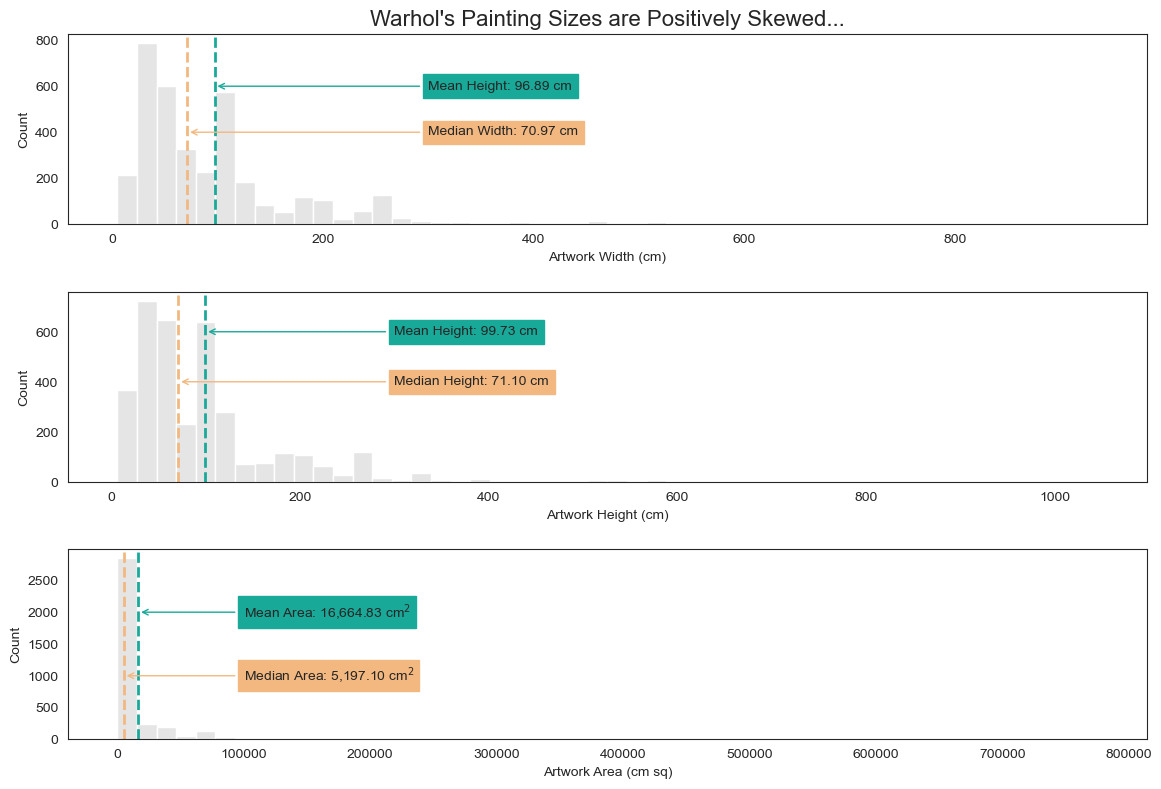

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Width
sns.histplot(
    data=warhol,
    x='width_cm',
    bins=50,
    ax=axs[0],
    color=colors['gray']
)

width_median = warhol['width_cm'].median()
axs[0].axvline(width_median, color=colors['orange'], ls='--', lw=2)
axs[0].annotate(
    'Median Width: {:,.2f} cm'.format(width_median), xy=(width_median, 400), 
    xycoords='data', xytext=(300, 400), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)
width_mean = warhol['width_cm'].mean()
axs[0].axvline(width_mean, color=colors['green'], ls='--', lw=2)
axs[0].annotate(
    'Mean Height: {:,.2f} cm'.format(width_mean), xy=(width_mean, 600), 
    xycoords='data', xytext=(300, 600), 
    textcoords='data', arrowprops=dict(edgecolor=colors['green'], arrowstyle='->'), backgroundcolor=colors['green'],
    horizontalalignment='left', verticalalignment='center'
)

# Height
sns.histplot(
    data=warhol,
    x='height_cm',
    bins=50,
    ax=axs[1],
    color=colors['gray']
)

height_median = warhol['height_cm'].median()
axs[1].axvline(height_median, color=colors['orange'], ls='--', lw=2)
axs[1].annotate(
    'Median Height: {:,.2f} cm'.format(height_median), xy=(height_median, 400), 
    xycoords='data', xytext=(300, 400), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)
height_mean = warhol['height_cm'].mean()
axs[1].axvline(height_mean, color=colors['green'], ls='--', lw=2)
axs[1].annotate(
    'Mean Height: {:,.2f} cm'.format(height_mean), xy=(height_mean, 600), 
    xycoords='data', xytext=(300, 600), 
    textcoords='data', arrowprops=dict(edgecolor=colors['green'], arrowstyle='->'), backgroundcolor=colors['green'],
    horizontalalignment='left', verticalalignment='center'
)

# Area
sns.histplot(
    data=warhol,
    x='area_cm_sq',
    bins=50,
    ax=axs[2],
    color=colors['gray']
)

area_median = warhol['area_cm_sq'].median()
axs[2].axvline(area_median, color=colors['orange'], ls='--', lw=2)
axs[2].annotate(
    'Median Area: {:,.2f} cm$^2$'.format(area_median), xy=(area_median, 1000), 
    xycoords='data', xytext=(100_000, 1000), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)
area_mean = warhol['area_cm_sq'].mean()
axs[2].axvline(area_mean, color=colors['green'], ls='--', lw=2)
axs[2].annotate(
    'Mean Area: {:,.2f} cm$^2$'.format(area_mean), xy=(area_mean, 2000), 
    xycoords='data', xytext=(100_000, 2000), 
    textcoords='data', arrowprops=dict(edgecolor=colors['green'], arrowstyle='->'), backgroundcolor=colors['green'],
    horizontalalignment='left', verticalalignment='center'
)


fig.tight_layout(pad=2)

axs[0].set_title("Warhol's Painting Sizes are Positively Skewed...", fontsize=titlefontsize)
axs[0].set_xlabel("Artwork Width (cm)")
axs[1].set_xlabel("Artwork Height (cm)")
axs[2].set_xlabel("Artwork Area (cm sq)");

Now let's see if taking the log of these dimensions helps us see the distribution better.

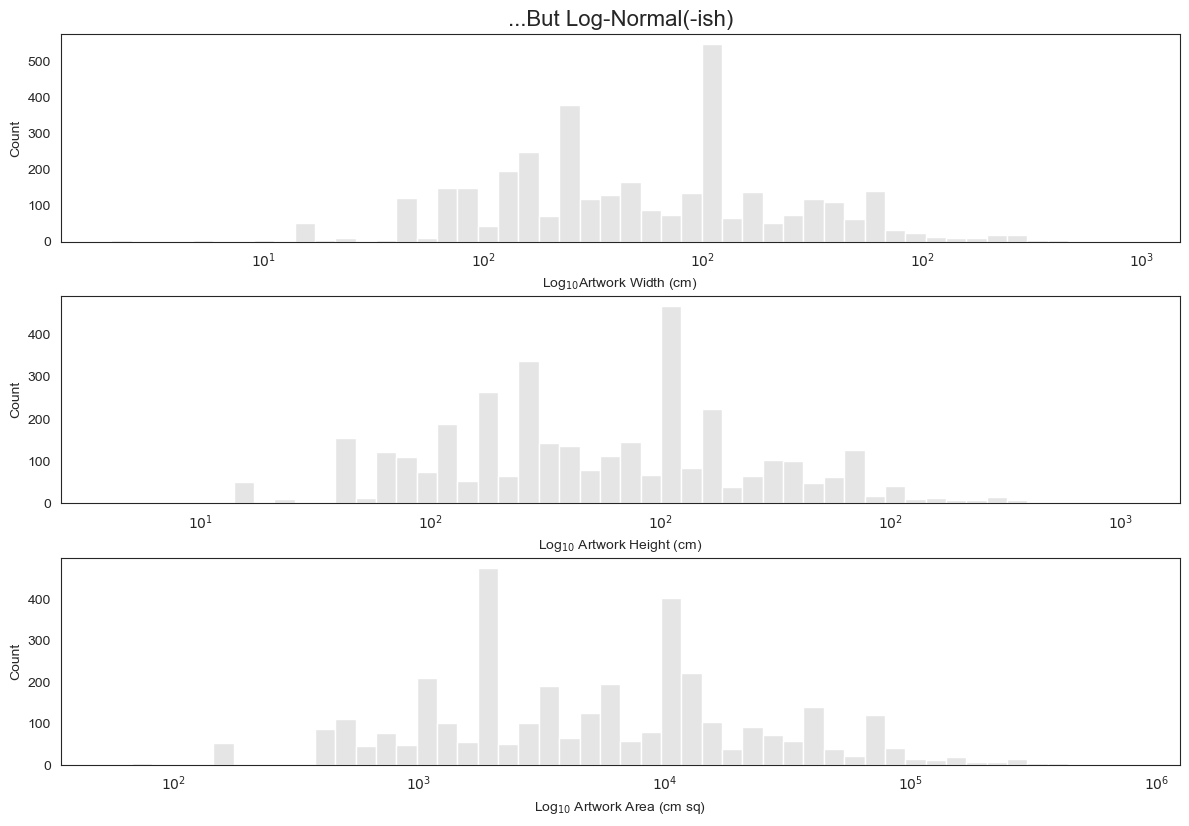

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Width
sns.histplot(
    x=np.log10(warhol['width_cm']),
    bins=50,
    ax=axs[0],
    color=colors['gray']
)

# Height
sns.histplot(
    x=np.log10(warhol['height_cm']),
    bins=50,
    ax=axs[1],
    color=colors['gray']
)

# Area
sns.histplot(
    x=np.log10(warhol['area_cm_sq']),
    bins=50,
    ax=axs[2],
    color=colors['gray']
)

fig.tight_layout()

axs[0].set_title("...But Log-Normal(-ish)", fontsize=titlefontsize)
axs[0].set_xlabel("Log$_{10}$Artwork Width (cm)")
axs[1].set_xlabel("Log$_{10}$ Artwork Height (cm)")
axs[2].set_xlabel("Log$_{10}$ Artwork Area (cm sq)")

# Format log scale
for ax in axs:
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$'))

Looking at this, my instinct is that training the model not on the raw dimensions but on their log will help generate more accurate predictions.

# 3. Auction Price and Painting Size are Positively Correlated for Warhol
What was true of the overall dataset is true in Warhol's case, too.

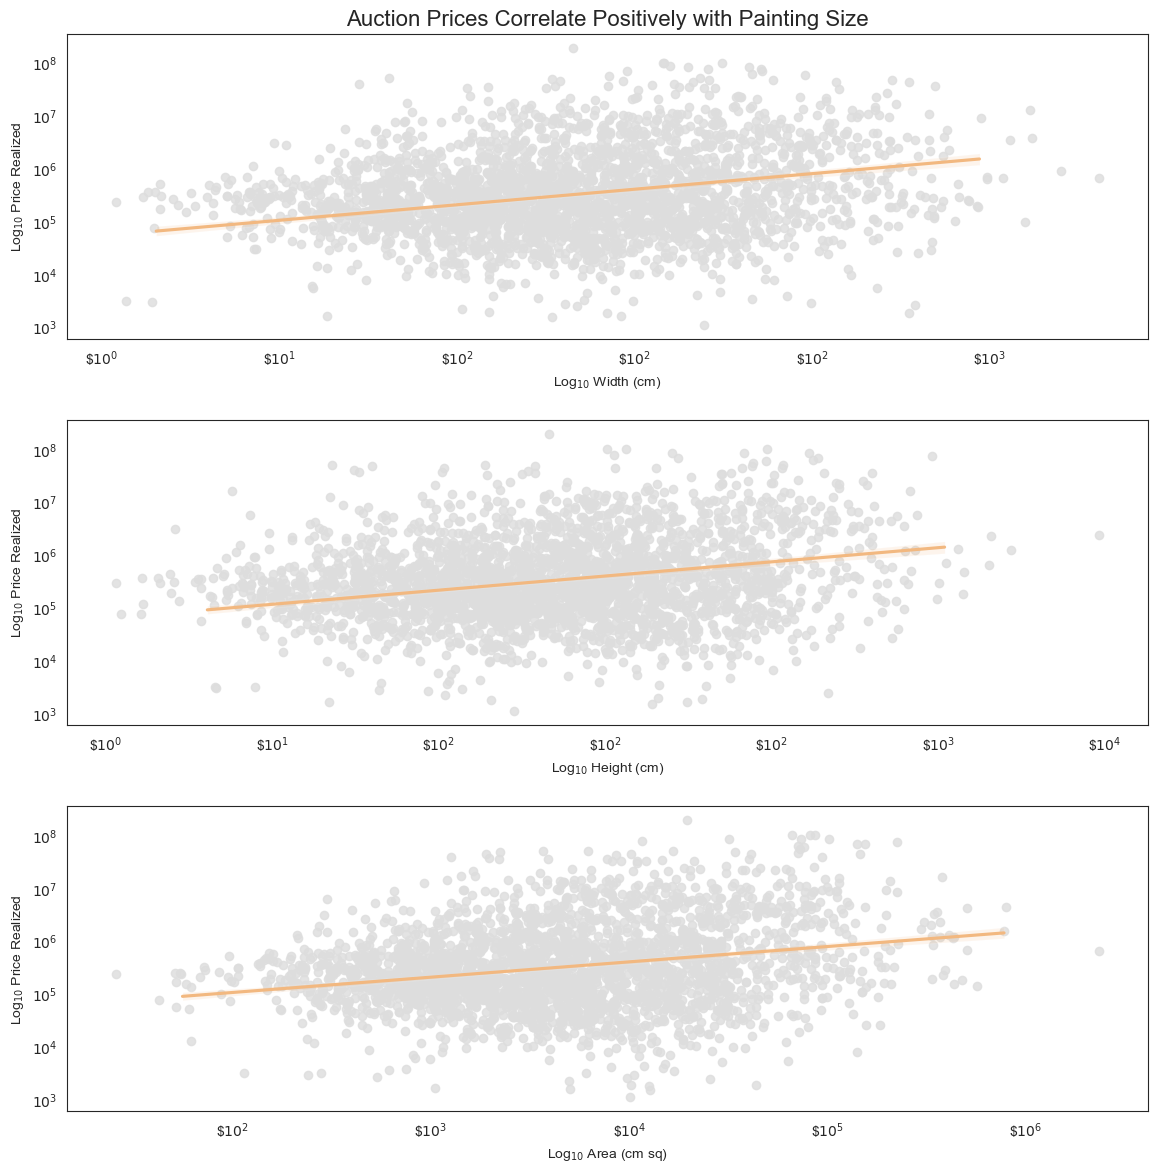

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Width
sns.regplot(
    x=np.log10(warhol['width_cm']),
    y=np.log10(warhol['price_realized_USD_constant_2022']),
    ax=axs[0],
    x_jitter=.5, line_kws=dict(color=colors['orange']),
    color=colors['gray']
)

# Height
sns.regplot(
    x=np.log10(warhol['height_cm']),
    y=np.log10(warhol['price_realized_USD_constant_2022']),
    ax=axs[1],
    x_jitter=.5, line_kws=dict(color=colors['orange']),
    color=colors['gray']
)

# Area
sns.regplot(
    x=np.log10(warhol['area_cm_sq']),
    y=np.log10(warhol['price_realized_USD_constant_2022']),
    ax=axs[2],
    x_jitter=.5, line_kws=dict(color=colors['orange']),
    color=colors['gray']
)

fig.tight_layout(pad=3)

axs[0].set_title('Auction Prices Correlate Positively with Painting Size', fontsize=titlefontsize)
axs[0].set_xlabel('Log$_{10}$ Width (cm)')
axs[0].set_ylabel('Log$_{10}$ Price Realized')

axs[1].set_xlabel('Log$_{10}$ Height (cm)')
axs[1].set_ylabel('Log$_{10}$ Price Realized')

axs[2].set_xlabel('Log$_{10}$ Area (cm sq)')
axs[2].set_ylabel('Log$_{10}$ Price Realized')

for ax in axs:
    ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$'))
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'));
    

# 4. ICYMI: Warhol's Value is Increasing Over Time
Since we've already adjusted for inflation, any change we see *should* be due to Warhol's value increasing over time, *not* the incidental effects of inflation.

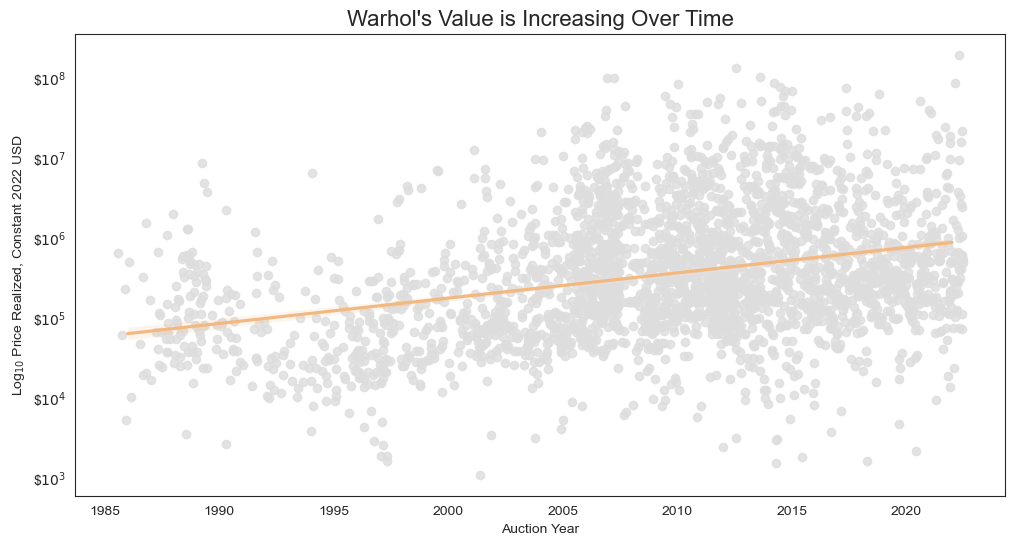

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(
    x=warhol['auction_year'],
    y=np.log10(warhol['price_realized_USD_constant_2022']),
    ax=ax,
    color=colors['gray'],
    x_jitter=.5, line_kws=dict(color=colors['orange'])
    
)

ax.set_title('Warhol\'s Value is Increasing Over Time', fontsize=titlefontsize)
ax.set_xlabel('Auction Year')
ax.set_ylabel('Log$_{10}$ Price Realized, Constant 2022 USD')

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'));

# 5. Prices Vary by Auction House
As with the larger dataset, prices for Warhol's paintings vary by auction house.

In [17]:
# Count instances of each auction house
auction_house_counts = warhol['auction_house_name'].value_counts()

# Get auction houses above 100-count thresshold
top_auction_houses = auction_house_counts[auction_house_counts > 100].index.to_list()

# Create mask for top auction houses
is_top_auction_house = warhol['auction_house_name'].isin(top_auction_houses)

# Create new feature to reduce cardinality of existing feature
warhol.loc[is_top_auction_house, 'auction_house_name_reduced'] = warhol.loc[is_top_auction_house, 'auction_house_name']
warhol.loc[~is_top_auction_house & warhol['auction_house_name'].notna(), 'auction_house_name_reduced'] = 'Other'

warhol[['auction_house_name', 'auction_house_name_reduced']].sample(10)

,auction_house_name,auction_house_name_reduced
4438,Christie's,Christie's
4602,Christie's,Christie's
5231,Finarte Casa d'Aste,Other
5104,Christie's,Christie's
3468,Sotheby's,Sotheby's
5062,Cornette de Saint Cyr,Other
4975,Christie's,Christie's
3670,Phillips,Phillips
2854,H��tel de Ventes de Monte-Carlo,Other
3320,Galleria Poleschi Casa d'Aste SRL,Other


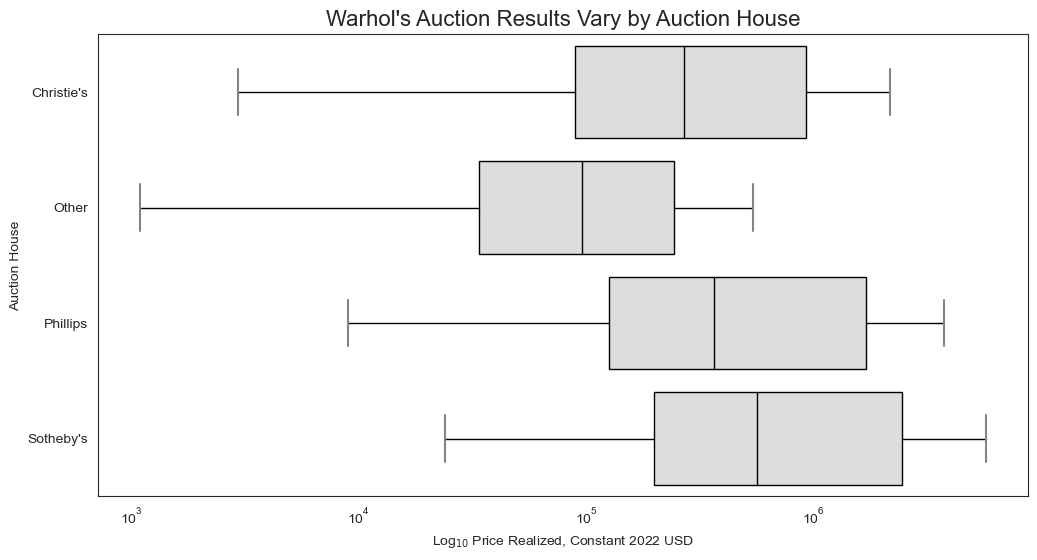

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    y='auction_house_name_reduced',
    ax=ax,
    showfliers=False,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    flierprops=flierprops,
    medianprops=medianprops
)

ax.set_title('Warhol\'s Auction Results Vary by Auction House', fontsize=titlefontsize)
ax.set_xlabel('Log$_{10}$ Price Realized, Constant 2022 USD')
ax.set_ylabel('Auction House')

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$${x:,.0f}'))
ax.set_xscale('log');

# 6. Prices Vary by Auction Location
Same is true of auction location.

In [20]:
# Count instances of each auction house
auction_loc_counts = warhol['auction_house_loc'].value_counts()

# Get auction houses above 100-count thresshold
top_auction_locs = auction_loc_counts[auction_loc_counts > 100].index

# Create mask for top auction houses
is_top_auction_loc = warhol['auction_house_loc'].isin(top_auction_locs)

# Create new feature to reduce cardinality of existing feature
warhol.loc[is_top_auction_loc, 'auction_house_loc_reduced'] = warhol.loc[is_top_auction_loc, 'auction_house_loc']
warhol.loc[~is_top_auction_loc & warhol['auction_house_loc'].notna(), 'auction_house_loc_reduced'] = 'Other'

warhol[['auction_house_loc', 'auction_house_loc_reduced']].sample(10)

,auction_house_loc,auction_house_loc_reduced
2651,NaN,NaN
3906,New York,New York
3326,NaN,NaN
4311,Cologne,Other
3409,NaN,NaN
2479,New York,New York
5422,London,London
5094,New York,New York
2358,New York,New York
3526,NaN,NaN


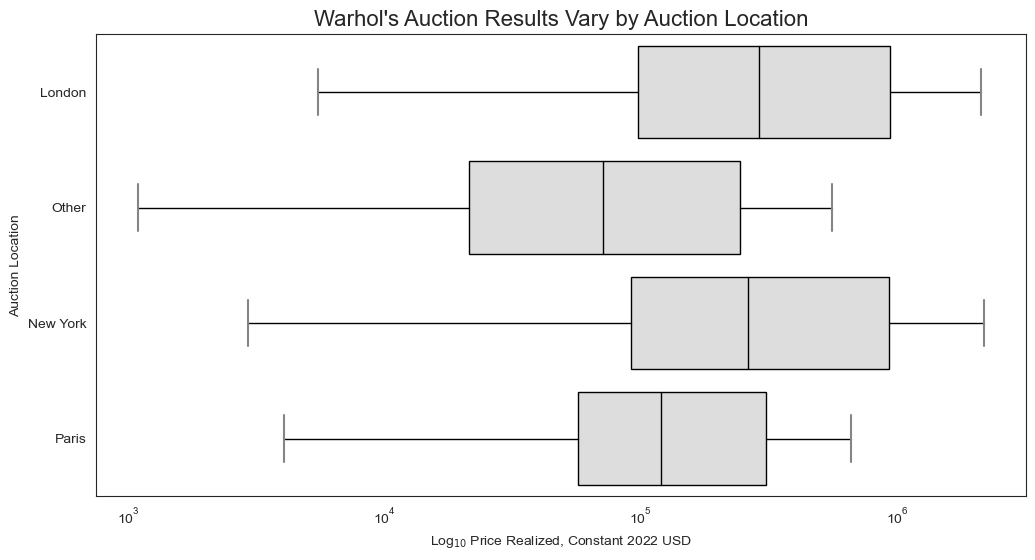

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    y='auction_house_loc_reduced',
    ax=ax,
    showfliers=False,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    flierprops=flierprops,
    medianprops=medianprops
)

ax.set_title('Warhol\'s Auction Results Vary by Auction Location', fontsize=titlefontsize)
ax.set_xlabel('Log$_{10}$ Price Realized, Constant 2022 USD')
ax.set_ylabel('Auction Location')

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

ax.set_xscale('log');

# 7. Prices Vary by Auction Decade
This makes sense: Artist markets (like anything, really) go through cycles. In this case, it looks like the 2010s saw especially high sales, which could be a sign of more demand and/or less supply, or just a function of what works came up for auction at a given time

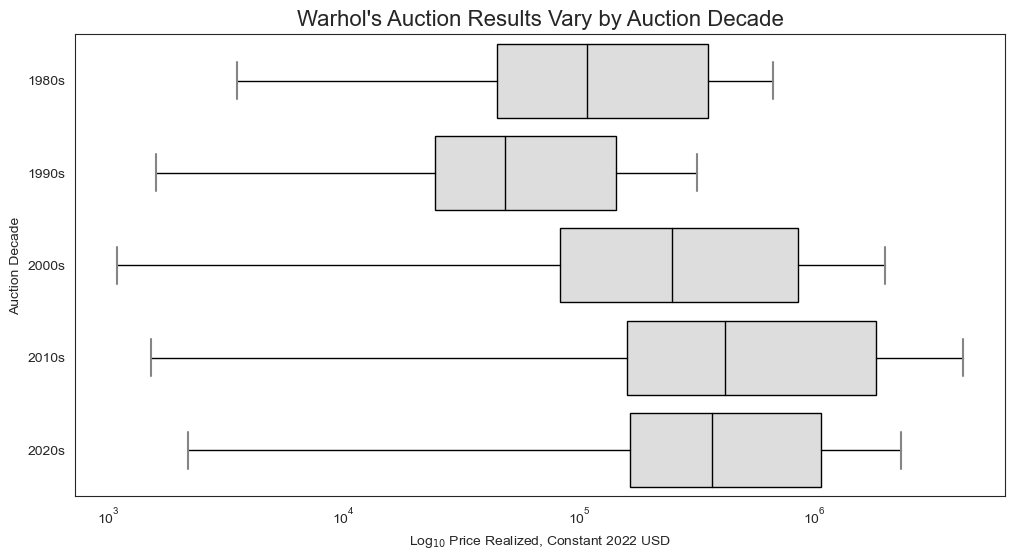

In [22]:
auction_decade = (warhol['auction_year'] // 10 * 10).astype('str') + 's'
auction_decade_order = auction_decade.unique()
auction_decade_order.sort()

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    y=auction_decade,
    ax=ax, showfliers=False, order=auction_decade_order,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    flierprops=flierprops,
    medianprops=medianprops
)

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

ax.set_xlabel('Log$_{10}$ Price Realized, Constant 2022 USD')
ax.set_ylabel('Auction Decade')
ax.set_title('Warhol\'s Auction Results Vary by Auction Decade', fontsize=titlefontsize)

ax.set_xscale('log');

What if we look at a more granular level, say ever 5-year window?

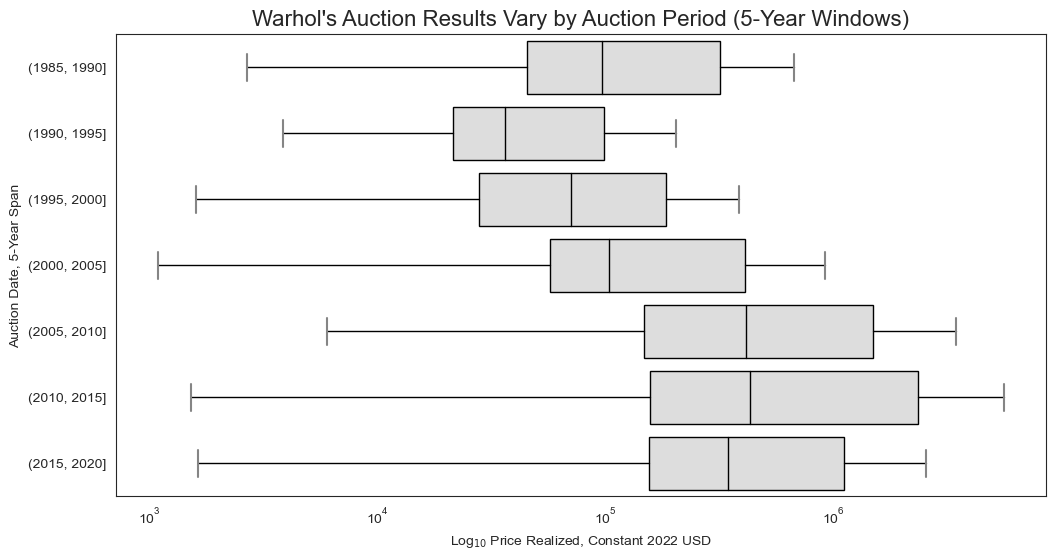

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    y=pd.cut(warhol['auction_year'], bins=range(1985, 2025, 5)),
    ax=ax, showfliers=False,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    flierprops=flierprops,
    medianprops=medianprops
)

ax.set_title('Warhol\'s Auction Results Vary by Auction Period (5-Year Windows)', fontsize=titlefontsize)
ax.set_xlabel('Log$_{10}$ Price Realized, Constant 2022 USD')
ax.set_ylabel('Auction Date, 5-Year Span')

ax.set_xscale('log');

# 8. Prices Vary by Artwork Date
This makes perfect sense--i.e., that certain periods of Warhol's career will be more or less valuable than others. I expect this is a function of supply (works from certain periods may be more or less scarce) and historical significance (works from certain periods may be deemed more or less significant), among other things.

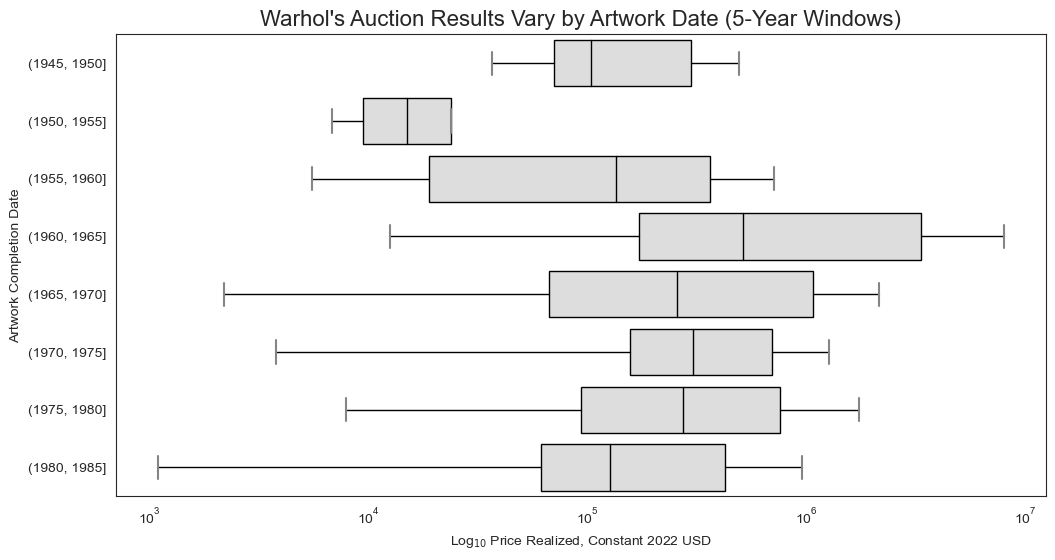

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=warhol,
    y=pd.cut(warhol['end_date'], bins=range(1945, 1990, 5)),
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=ax,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    flierprops=flierprops,
    medianprops=medianprops
)

ax.set_title('Warhol\'s Auction Results Vary by Artwork Date (5-Year Windows)', fontsize=titlefontsize)
ax.set_xlabel('Log$_{10}$ Price Realized, Constant 2022 USD')
ax.set_ylabel('Artwork Completion Date')

ax.set_xscale('log');

The artwork's date poses some interesting problems when conceiving it as a feature for the entire dataset. For an artist like Warhol, the 1960s may be a hugely important time. Whereas for an artist who passed away in the 1950s, this same period would be meaningless.

One solution is to date artworks not by year but relative to an artist's age. This would allow us to compare two works made at comparable periods in their artist's life even if one was completed in 1920 and the other in 1965.

This solution would help normalize artwork dates, but it is still limited, since it does not account for the fact that some artists created their more important work early in their career and others later in their career.

Warhol is actually an interesting example here, since he broke into the artwork relatively late in life, which many may not realize: Through his 20s he worked professionally as a commercial artist; it was not until he was 34 years old when he debuted his 32 Campbell's Soup Can screenprint works at Ferus Gallery in Los Angeles in 1962! So it won't come as any surprise, then, to see that Warhol's most highly-valued works were made when he was 35-years old!

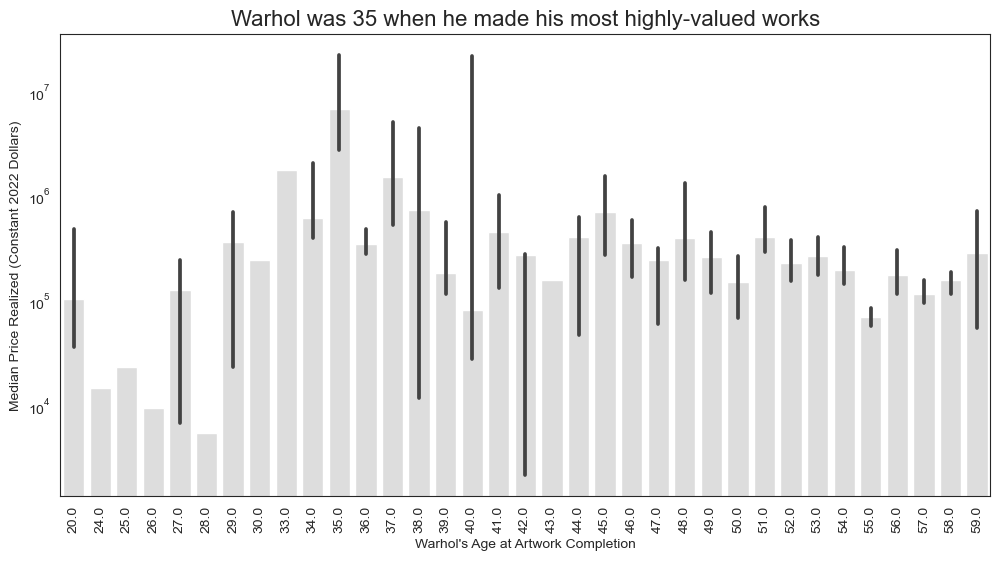

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    data=warhol.dropna(subset=['artist_age_at_artwork_completion', 'price_realized_USD_constant_2022']),
    x='artist_age_at_artwork_completion',
    y='price_realized_USD_constant_2022',
    ax=ax,
    #palette=[pink for x in range(len(warhol['end_date'].unique()))]
    color=colors['gray'], estimator="median",
)


ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=90)

ax.set_title('Warhol was 35 when he made his most highly-valued works', fontsize=titlefontsize)
ax.set_ylabel('Median Price Realized (Constant 2022 Dollars)')
ax.set_xlabel('Warhol\'s Age at Artwork Completion')

ax.set_yscale('log');

To make this point more concretely, look at how work made at various points in Warhol's life compares to work made at the same periods in other artists' lives.

For Warhol, the work made when he was 30–35 years old fetches the highest prices. For Mondrian, it's his late work--stuff he made after 45. And for Braque, his early work is most highly valued.

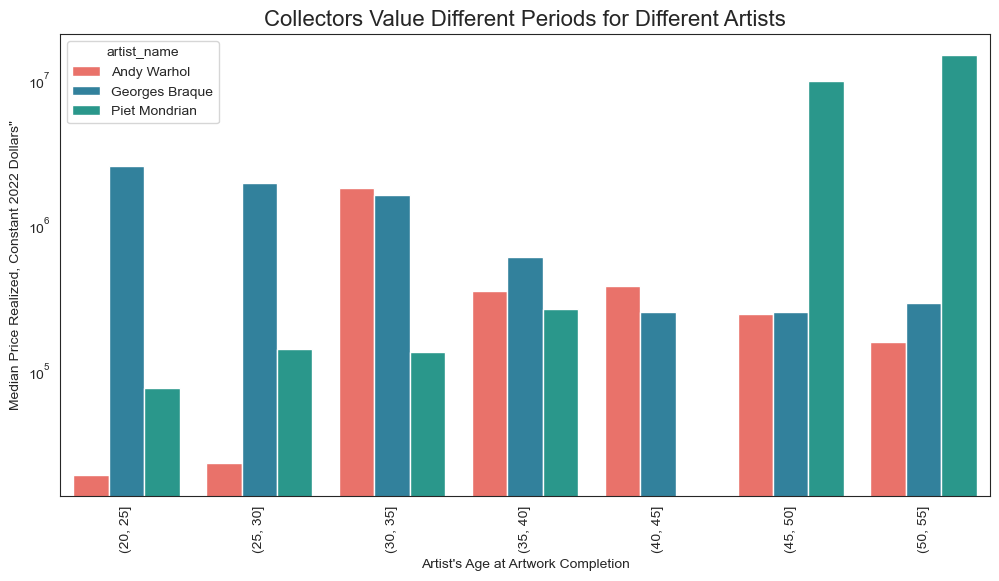

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

df = (
    data[data['artist_name'].isin(['Andy Warhol', 'Georges Braque', 'Piet Mondrian'])]
    .dropna(subset=['artist_age_at_artwork_completion', 'price_realized_USD_constant_2022'])
)

sns.barplot(
    data=df,
    x=pd.cut(df['artist_age_at_artwork_completion'], range(20, 60, 5)),
    y='price_realized_USD_constant_2022',
    hue='artist_name',
    ax=ax,
    estimator="median", errorbar=None
)


ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=90)

ax.set_title('Collectors Value Different Periods for Different Artists', fontsize=titlefontsize)
ax.set_ylabel('Median Price Realized, Constant 2022 Dollars"')
ax.set_xlabel('Artist\'s Age at Artwork Completion')

ax.set_yscale('log');

# 9. Warhol's Work Accrues Value with Age
Here's another intuitive one: As Warhol's work gets older, it accrues value.

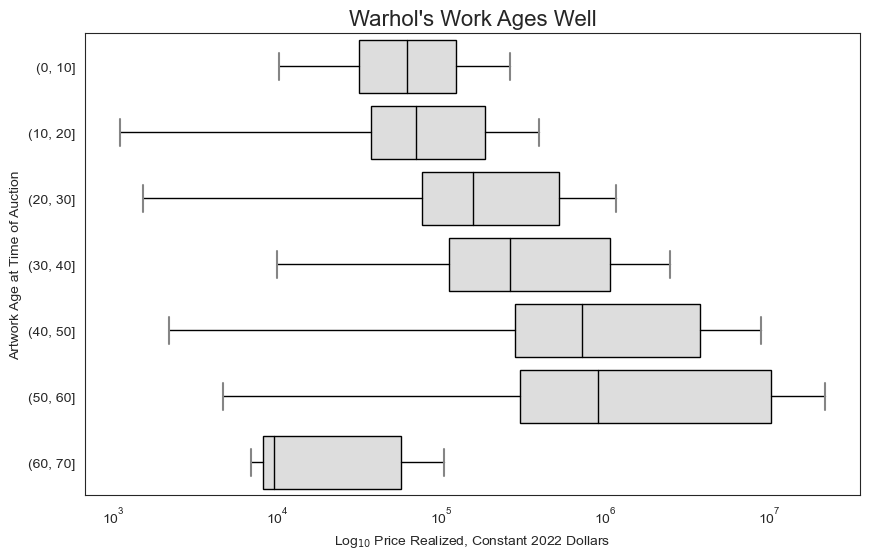

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    y=pd.cut(warhol['artwork_age_at_auction'], bins=range(0, 75, 10)),
    x=warhol['price_realized_USD_constant_2022'],
    ax=ax,
    showfliers=False,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    flierprops=flierprops,
    medianprops=medianprops
)


ax.set_title('Warhol\'s Work Ages Well', fontsize=titlefontsize)
ax.set_xlabel('Log$_{10}$ Price Realized, Constant 2022 Dollars')
ax.set_ylabel('Artwork Age at Time of Auction')

ax.set_xscale('log')

# Takeaways
- Target variable should be not `price_realized_USD` but its log.
- For dimensional variables (`width_cm`, `height_cm`, and `area_cm_sq`), the model should be trained on their log (although there doesn't appear to be much correlation here).
- With all the other features we examined, there do seem to be very real and noticible correlations with price, which makes me think we're on the right track for a functional model specific to Warhol.